xy_one = [1. 0.]
xy_one = [1. 1.]
xy_one = [-1.  0.]
xy_one = [1. 1.]
xy_one = [1. 1.]
xy_one = [1.8 3.2]
xy_one = [1.0000000e+00 8.8817842e-16]


/tmp/ipykernel_238564/60568371.py:95: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.linalg.det(logP_d2)/(2*np.pi**2)) * np.exp(0.5*np.einsum('i...,ij,j...->...', xy_diff, logP_d2, xy_diff))


xy_one = [0.66666667 0.        ]
xy_one = [0.86206897 0.48275862]
xy_one = [-2.          0.33333333]
xy_one = [1. 1.]
xy_one = [1.8 2.4]
xy_one = [1.66153846 2.43076923]
xy_one = [1.85365854 3.6097561 ]
xy_one = [0.5 0. ]
xy_one = [0.83333333 0.33333333]
Singular hessian in xy_zero= (0, 1)
xy_one = [-2  3]
xy_one = [1. 1.]
xy_one = [1.5 2. ]
xy_one = [1.64285714 2.28571429]
xy_one = [1.9 3.8]
xy_one = [0.28571429 0.        ]
xy_one = [0.82905983 0.18803419]
xy_one = [0.66666667 0.71428571]
xy_one = [1. 1.]
xy_one = [1.32786885 1.90163934]
xy_one = [1.64528302 2.16603774]
xy_one = [1.93301435 3.92344498]


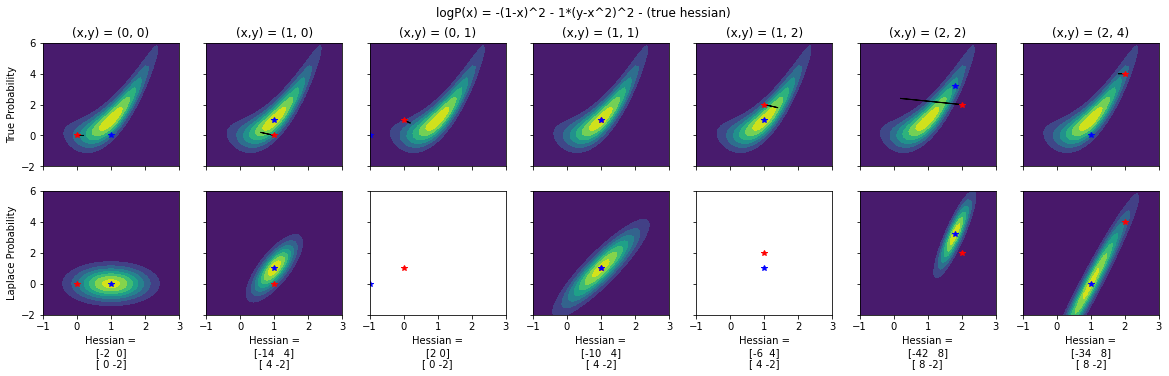

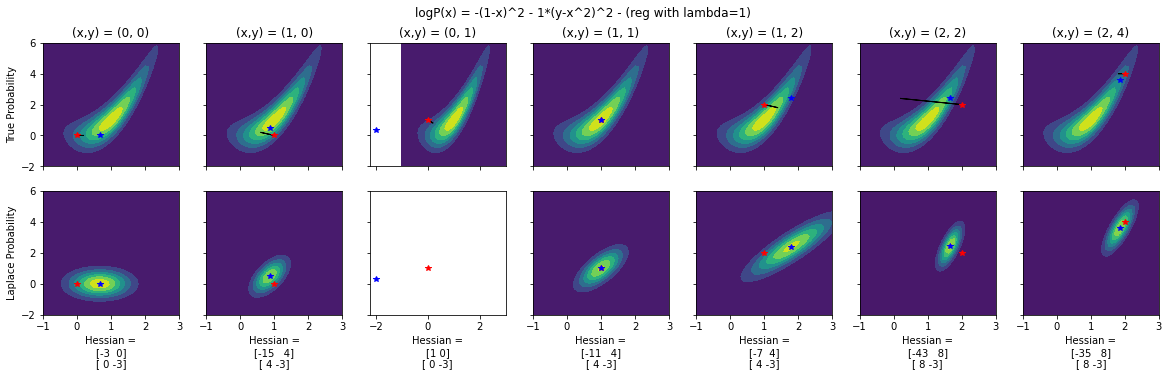

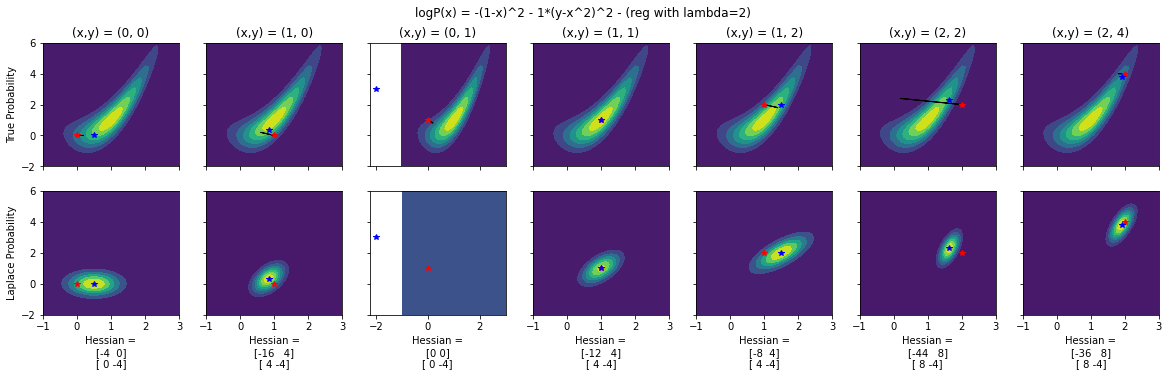

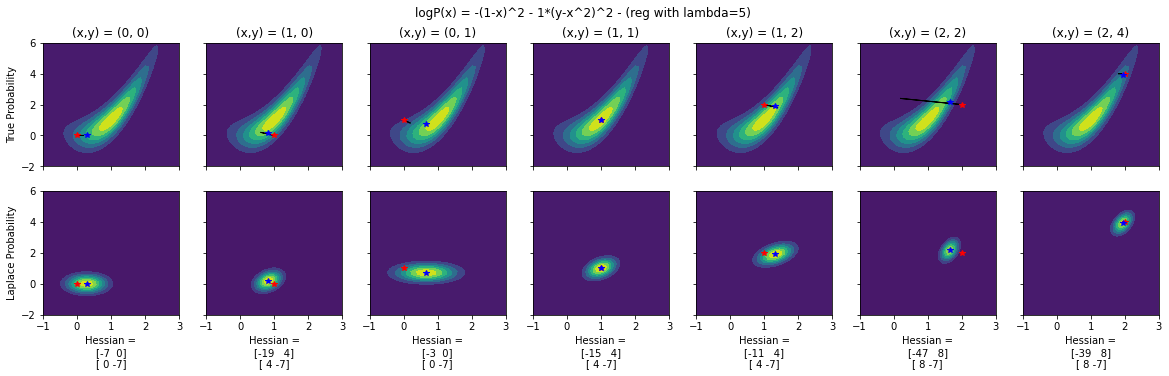

In [10]:
import numpy as np
import matplotlib.pyplot as plt

onedimensional = False

def random_function(a,b):
    return lambda x: -x**2 + a*np.cos(x+b)
def random_function_d1(a,b):
    return lambda x: -2*x - a*np.sin(x+b)
def random_function_d2(a,b):
    return lambda x: -2 - a*np.cos(x+b)

def rosenbrock(a,b):
    return lambda x,y : -(a-x)**2 - b*(y-x**2)**2
def rosenbrock_d1(a,b):
    return lambda x,y: np.array([2*(a-x) + 4*b*x*(y-x**2),
                                 -2*b*(y-x**2)] )
def rosenbrock_d2(a,b):
    return lambda x,y: np.array([[-2 + 4*b*(y-x**2) - 8*b*x**2,     4*b*x],
                                 [4*b*x,                            -2*b ]])


if onedimensional:
    n_points_axis = 50
    min_range_axis, max_range_axis = -5, 5  
    a, b = 0, 0
    logPfunction = random_function(a,b)
    logPfunction_d1 = random_function_d1(a,b)
    logPfunction_d2 = random_function_d2(a,b)

    x_grid = np.linspace(min_range_axis, max_range_axis, n_points_axis, dtype=np.float32)
    normalization = np.sum(np.exp(logPfunction(x_grid))) * (max_range_axis-min_range_axis) / n_points_axis
    logPfunction_n = lambda x: logPfunction(x) - np.log(normalization)

    x_zeros = [-2, -1, -0.5, 0, 0.5, 1, 2]
    fig, axs = plt.subplots(2, len(x_zeros), sharex='col', sharey='row', figsize=(20,5))
    for ix, x_zero in enumerate(x_zeros):
        logP = logPfunction_n(x_zero)
        logP_d1 = logPfunction_d1(x_zero)
        logP_d2 = logPfunction_d2(x_zero)

        x_one = x_zero - logP_d1/logP_d2
        laplace_logPfunction = lambda x: logP - 0.5*logP_d1**2/logP_d2 + 0.5*logP_d2*(x-x_one)**2
        laplace_Pfunction = lambda x: np.sqrt(-logP_d2/(2*np.pi)) * np.exp(0.5*logP_d2*(x-x_one)**2)

        print(f"x={x_zero}, f(x)={round(logP,2)}, f'(x)={round(logP_d1,2)}, f''(x)={round(logP_d2,2)} ---> x_one={round(x_one,2)}")
        axs[0, ix].plot(x_grid, logPfunction_n(x_grid), label='True')
        axs[0, ix].plot(x_grid, laplace_logPfunction(x_grid), c='g', label='Laplace')
        axs[0, ix].axvline(x=x_zero, c='g', alpha=0.5)
        axs[0, ix].set_title('x = '+str(x_zero))
        axs[1, ix].plot(x_grid, np.exp(logPfunction_n(x_grid)), label='True')
        axs[1, ix].plot(x_grid, laplace_Pfunction(x_grid), c='g', label='Laplace')
        axs[1, ix].axvline(x=x_zero, c='g', alpha=0.5)
        if ix==0:
            axs[0, ix].set_ylabel('log Probability')
            axs[0, ix].legend()
            axs[1, ix].set_ylabel('Probability')
    fig.suptitle(f"logP(x) = -x^2 + {a}*cos(x+{b})")
    fig.savefig("laplace_test/prob_function.png")

else:
    # define the true (log) probability function and its derivatives
    a, b = 1, 1
    logPfunction = rosenbrock(a,b)
    logPfunction_d1 = rosenbrock_d1(a,b)
    logPfunction_d2 = rosenbrock_d2(a,b)

    # define a mesh grid
    n_points_axis = 50
    min_range_Xaxis, max_range_Xaxis = -1, 3
    min_range_Yaxis, max_range_Yaxis = -2, 6
    x_grid = np.linspace(min_range_Xaxis, max_range_Xaxis, n_points_axis, dtype=np.float32)
    y_grid = np.linspace(min_range_Yaxis, max_range_Yaxis, n_points_axis, dtype=np.float32)
    x_mesh, y_mesh = np.meshgrid(x_grid, y_grid)

    #normalize the true (log) probability function
    normalization = np.sum(np.exp(logPfunction(x_mesh,y_mesh))) * (max_range_Xaxis-min_range_Xaxis)*(max_range_Yaxis-min_range_Yaxis) / n_points_axis**2
    logPfunction_n = lambda x,y: logPfunction(x,y) - np.log(normalization)

    def laplace_approximation(xy_zero, logP, logP_d1, logP_d2):
        # invert the hessian
        try:
            logP_d2_inv = np.linalg.inv(logP_d2)
        except:
            print('Singular hessian in xy_zero=',xy_zero)
            logP_d2_inv = [[1,0],[0,1]]
        # compute the gaussian center
        xy_one = xy_zero - logP_d2_inv @ logP_d1
        print(f"xy_one = {xy_one}")
        def laplace_Pfunction(x,y): 
            try:
                xy_diff = (np.transpose([x,y],(2,1,0))-xy_one ).T
            except:
                xy_diff = [x,y] - xy_one
            return np.sqrt(np.linalg.det(logP_d2)/(2*np.pi**2)) * np.exp(0.5*np.einsum('i...,ij,j...->...', xy_diff, logP_d2, xy_diff))
        return laplace_Pfunction, xy_one
    
    def comparative_plot(xy_zeros, xy_ones, gradients, hessians, laplace_Pfunctions, type=''):
        # a column for each xy_zero
        # upper row for true probability function
        # lower row for laplace approximation of the probability function
        # red dot: xy_zero (the point where derivatives are computed)
        # blue_dot: xy_one (the center of the gaussian, according to Laplace)
        # black line: direction of the gradient
        fig, axs = plt.subplots(2, len(xy_zeros), sharex='col', sharey='row', figsize=(20,5))
        for i, (xy_zero, xy_one, gradient, hessian, laplace_Pfunction), in enumerate(zip(xy_zeros, xy_ones, gradients, hessians, laplace_Pfunctions)):
            axs[0, i].contourf(x_mesh, y_mesh, np.exp(logPfunction_n(x_mesh, y_mesh)))
            axs[0, i].plot(*xy_zero, 'r*')
            axs[0, i].plot(*xy_one, 'b*')
            axs[0, i].arrow(*xy_zero, *(0.1*gradient))
            axs[0, i].set_title(f"(x,y) = {xy_zero}")
            axs[1, i].contourf(x_mesh, y_mesh, laplace_Pfunction(x_mesh, y_mesh))
            axs[1, i].plot(*xy_zero, 'r*')
            axs[1, i].plot(*xy_one, 'b*')
            axs[1, i].set_xlabel('Hessian =\n'+str(hessian[0])+'\n'+str(hessian[1]))
        axs[0, 0].set_ylabel('True Probability')
        axs[1, 0].set_ylabel('Laplace Probability')
        fig.suptitle(f"logP(x) = -({a}-x)^2 - {b}*(y-x^2)^2 - ({type})")
        fig.savefig("plots/2D_prob_function_"+type+".png")


    xy_zeros = [(0,0), (1,0), (0,1), (1,1), (1,2), (2,2), (2,4)]

    # true hessian
    xy_ones, gradients, hessians, laplace_Pfunctions = [], [], [], []
    for ixy, xy_zero in enumerate(xy_zeros):
        logP = logPfunction_n(*xy_zero)
        logP_d1 = logPfunction_d1(*xy_zero)
        logP_d2 = logPfunction_d2(*xy_zero)
        gradients.append(logP_d1)
        hessians.append(logP_d2)
        #print(f"xy={xy_zero}\n f(x)={np.around(logP,2)}\n f'(x)={np.around(logP_d1,2)}\n f''(x)={np.around(logP_d2,2)}")
        laplace_Pfunction, xy_one = laplace_approximation(xy_zero, logP, logP_d1, logP_d2)
        laplace_Pfunctions.append(laplace_Pfunction)
        xy_ones.append(xy_one)
    comparative_plot(xy_zeros, xy_ones, gradients, hessians, laplace_Pfunctions, type='true hessian')

    # lambda identity regularization
    for lambda_reg in [1,2,5]:
        xy_ones, gradients, hessians, laplace_Pfunctions = [], [], [], []
        for ixy, xy_zero in enumerate(xy_zeros):
            logP = logPfunction_n(*xy_zero)
            logP_d1 = logPfunction_d1(*xy_zero)
            logP_d2 = logPfunction_d2(*xy_zero)
            logP_d2[0,0] -= lambda_reg
            logP_d2[1,1] -= lambda_reg
            gradients.append(logP_d1)
            hessians.append(logP_d2)
            #print(f"xy={xy_zero}\n f(x)={np.around(logP,2)}\n f'(x)={np.around(logP_d1,2)}\n f''(x)={np.around(logP_d2,2)}")
            laplace_Pfunction, xy_one = laplace_approximation(xy_zero, logP, logP_d1, logP_d2)
            laplace_Pfunctions.append(laplace_Pfunction)
            xy_ones.append(xy_one)
        comparative_plot(xy_zeros, xy_ones, gradients, hessians, laplace_Pfunctions, type='reg with lambda='+str(lambda_reg))
    

In [119]:
A = np.array([[1,2],[3,4]])
b = np.array([1,2])
b.T@A@b

27

In [115]:
b = np.array([b,b,b,b,b,b])
np.einsum('xi,ij,xj->x',b,A,b)

array([27, 27, 27, 27, 27, 27])